1. 이미지를 인식하는 원리

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#필요한 케라스 헤더파일 import

import matplotlib.pyplot as plt
import sys

#MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다.
(X_train,y_train),(X_test,y_test)=mnist.load_data()
#X_train과 X_test는 3차원배열로 [이미지 수][가로][세로]  즉 X_train => [60000][28][28]

#학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다.
print("학습셋 이미지 수 : %d 개"%(X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개"%(X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


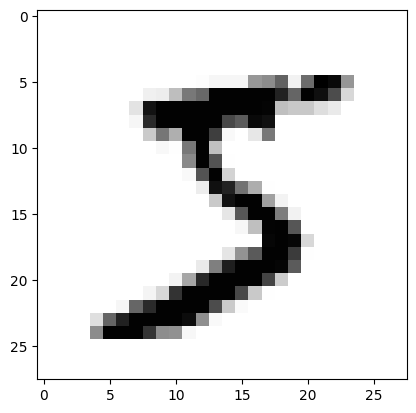

In [3]:
#첫 번째 이미지 확인
plt.imshow(X_train[0],cmap='Greys') #이미지 시각화
plt.show() #실제로 화면에 띄워주는 함수

In [5]:
#이미지가 인식되는 원리를 알아봅시다
for x in X_train[0]:
  for i in x:
    sys.stdout.write('%-4s'%i)#표준 출력에 데이터를 출력하는거
  sys.stdout.write('\n')

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   3   18  18  18  126 136 175 26  166 255 247 127 0   0   0   0   
0   0   0   0   0   0   0   0   30  36  94  154 170 253 253 253 253 253 225 172 253 242 195 64  0   0   0   0   
0   0   0   0   0   0   0   49  238 253 253 253 253 253 253 253 253 251 93  82  82  56  39  0   0   0   0   0   
0   0   0   0   0   0   0   18  219 253 253 253 253 253 198 182 247 241 0   0   0   0   0   0   

In [6]:
#치환 변환 과정 => 2차원을 1차원으로
X_train=X_train.reshape(X_train.shape[0],784)#2차원을 1차원으로 만들고
X_train=X_train.astype('float64')#정규화 => 0~255는 숫자가 너무 크니까 실수로 만들고 255를 나누어 0~1까지의 수로 만든다
X_train=X_train/255

X_test=X_test.reshape(X_test.shape[0],784).astype('float64')/255

#클래스 값 확인
print("class : %d"%(y_train[0])) #첫번째 이미지의 정답은 5다

#바이너리화 과정
y_train=to_categorical(y_train,10)#one-hot encoding => 해당범주에 해당하는 위치만 1 나머지는 0을 표시한다.
y_test=to_categorical(y_test,10)

print(y_train[0])

class : 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


2. 딥러닝 기본 프레임 만들기

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train=X_train.reshape(X_train.shape[0],784)#2차원을 1차원으로 만들고
X_train=X_train.astype('float64')#정규화 => 0~255는 숫자가 너무 크니까 실수로 만들고 255를 나누어 0~1까지의 수로 만든다
X_train=X_train/255

X_test=X_test.reshape(X_test.shape[0],784).astype('float64')/255

y_train=to_categorical(y_train,10)#one-hot encoding => 해당범주에 해당하는 위치만 1 나머지는 0을 표시한다.
y_test=to_categorical(y_test,10)

#모델 구조를 설정함
model=Sequential()#층을 쌓겠다
model.add(Dense(512,input_dim=784,activation='relu'))#input:784, 은닉층의 노드의 수  : 512(그냥 정하는거)
#출력되는 값 : 10 (0~9)
model.add(Dense(10,activation='softmax'))
#보여주는거
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#모델 실행 환경을 설정
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#손실함수 : categorical_crossentropy, 최적화 : adam, metrics : 성능을 측정하기 위한 지표 여기서는 정확도
#adam => 손실 함수를 통해 계산한 오차를 바탕으로 가중치와 편향을 어떻게 수정하여 오차를 최소화할지 결정하는 알고리즘

#모델 최적화를 위한 설정 구간
modelpath='./MNIST_MLP.keras' # .hdf5를 .keras로 변경 파일경로 지
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True)
#minitor : 검증 손실 값을 모니터링 대상으로 지정
#verbose : 모델이 저장될때마다 콘솔에 메세지 출력
#save_best_only : 모니터링 대상이 가장 좋았을때만 저장
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10)
#조기종료 콜백 10번동안 개선되지 않으면 종료

#모델을 실행합니다
history=model.fit(X_train,y_train,validation_split=0.25,epochs=30,batch_size=200,verbose=0,callbacks=[early_stopping_callback,checkpointer])
#validation_split=0.25 : 전제 학습 데이터에서 25%를 떼어내어 검증 데이터 셋으로 사용
#epochs=30 : 전체 학습 데이터 셋을 총 30번 반복
#batch_size : 가중치 업데이트를 위한 데이터 샘플 개수
#callbacks : 앞에서 정의한 학습제어 기능을 적용
#테스트 정확도를 출력
print('\n test accuracy : %.4f'%(model.evaluate(X_test,y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18460, saving model to ./MNIST_MLP.keras

Epoch 2: val_loss improved from 0.18460 to 0.13051, saving model to ./MNIST_MLP.keras

Epoch 3: val_loss improved from 0.13051 to 0.12215, saving model to ./MNIST_MLP.keras

Epoch 4: val_loss improved from 0.12215 to 0.09723, saving model to ./MNIST_MLP.keras

Epoch 5: val_loss improved from 0.09723 to 0.08915, saving model to ./MNIST_MLP.keras

Epoch 6: val_loss did not improve from 0.08915

Epoch 7: val_loss did not improve from 0.08915

Epoch 8: val_loss did not improve from 0.08915

Epoch 9: val_loss did not improve from 0.08915

Epoch 10: val_loss improved from 0.08915 to 0.08228, saving model to ./MNIST_MLP.keras

Epoch 11: val_loss improved from 0.08228 to 0.08159, saving model to ./MNIST_MLP.keras

Epoch 12: val_loss improved from 0.08159 to 0.08100, saving model to ./MNIST_MLP.keras

Epoch 13: val_loss did not improve from 0.08100

Epoch 14: val_loss did not improve from 0.08100

Epoch 15: val_

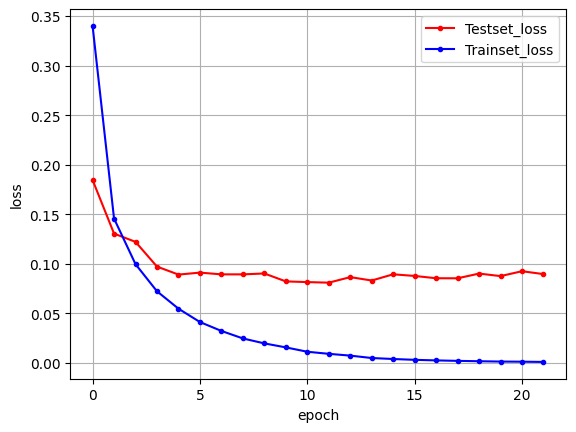

In [18]:
#검증셋과 학습셋의 오차를 저장
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

#그래프로 표현
x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c="red",label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c="blue",label='Trainset_loss')

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

5. 컨볼루션 신경망 실행

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

#데이터 불러옴
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

#컨볼루션 신경망 설정
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), input_shape=(28,28,1),activation='relu'))
#컨볼루션 하는거 즉 frature map 만드는 저기서 왜 28,28이냐면 여기서는 2차원이니까 그리고 마지막 1은 흑백, 3은 컬러
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#풀링 : 2X2에서 가장 큰값만 가져온다
model.add(Dropout(0.25))
#25%노드를 꺼지게 하는거
model.add(Flatten())
#마지막에 일반 딥러닝으로 넣어야해서 평탄화 작업 => 1차원으로 바꿔주는거
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
#마지막 결과값

#모델의 실행 옵션을 설정
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#모델 최적화를 위한 설정 구간
modelpath='./MNIST_MLP.keras' # .hdf5를 .keras로 변경 파일경로 지
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True)
#minitor : 검증 손실 값을 모니터링 대상으로 지정
#verbose : 모델이 저장될때마다 콘솔에 메세지 출력
#save_best_only : 모니터링 대상이 가장 좋았을때만 저장
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10)
#조기종료 콜백 10번동안 개선되지 않으면 종료

#모델을 실행합니다
history=model.fit(X_train,y_train,validation_split=0.25,epochs=30,batch_size=200,verbose=0,callbacks=[early_stopping_callback,checkpointer])
#validation_split=0.25 : 전제 학습 데이터에서 25%를 떼어내어 검증 데이터 셋으로 사용
#epochs=30 : 전체 학습 데이터 셋을 총 30번 반복
#batch_size : 가중치 업데이트를 위한 데이터 샘플 개수
#callbacks : 앞에서 정의한 학습제어 기능을 적용
#테스트 정확도를 출력
print('\n test accuracy : %.4f'%(model.evaluate(X_test,y_test)[1]))

#왜 100%가 안되는걸까?? => 데이터셋에 사람도 못알아보는 손글씨가 있어서 그렇다......

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 0.08128, saving model to ./MNIST_MLP.keras

Epoch 2: val_loss improved from 0.08128 to 0.05616, saving model to ./MNIST_MLP.keras

Epoch 3: val_loss improved from 0.05616 to 0.05238, saving model to ./MNIST_MLP.keras

Epoch 4: val_loss improved from 0.05238 to 0.04501, saving model to ./MNIST_MLP.keras

Epoch 5: val_loss improved from 0.04501 to 0.04402, saving model to ./MNIST_MLP.keras

Epoch 6: val_loss improved from 0.04402 to 0.04132, saving model to ./MNIST_MLP.keras

Epoch 7: val_loss improved from 0.04132 to 0.04062, saving model to ./MNIST_MLP.keras

Epoch 8: val_loss did not improve from 0.04062

Epoch 9: val_loss did not improve from 0.04062

Epoch 10: val_loss did not improve from 0.04062

Epoch 11: val_loss improved from 0.04062 to 0.04041, saving model to ./MNIST_MLP.keras

Epoch 12: val_loss did not improve from 0.04041

Epoch 13: val_loss did not improve from 0.04041

Epoch 14: val_loss did not improve from 0.04041

Epoch 15: val_

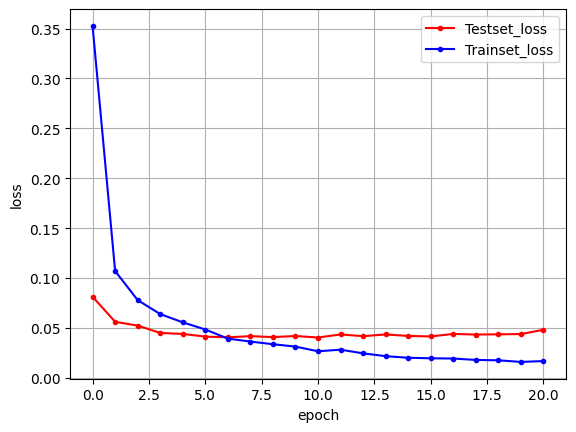

In [24]:
#검증셋과 학습셋의 오차를 저장
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

#그래프로 표현
x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c="red",label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c="blue",label='Trainset_loss')

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()